# First import all the libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv

## Mounting drive to use data files from drives

In [5]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


## Read the data using pandas


In [8]:
movies =  pd.read_csv("/content/drive/My Drive/Data Science/Movie Recommendation System/imdb_5000_movies.csv")

## No Error means we access the files correctly

### Let's read the file now using pandas

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Wrangling the data

Data wrangling is the process of gathering, selecting, and transforming data to answer an analytical question.

## Let's see detailed information about dataset

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Let's check the length of our data

In [11]:
print(len(movies))

4803


## Now let's describe our data

In [14]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Let's print the column name of our data

In [15]:
mov_col = movies.columns
print(mov_col)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


## Let's clean our data

first we need to know which columns is not important for me to delete it from original data.

In [16]:
del_col = [ 'id', 'popularity', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies', 'vote_average']

#drop it from our data

movies.drop(del_col,axis = 1 ,inplace = True)

## Let's see detailed information again

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   production_countries  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   spoken_languages      4803 non-null   object 
 9   status                4803 non-null   object 
 10  title                 4803 non-null   object 
 11  vote_count            4803 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 450.4+ KB


In [19]:
movies.head()

,budget,genres,original_language,original_title,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,2124


## Remove the NaN object or 0

In [20]:
columns = ['budget', 'revenue']
movies[columns] = movies[columns].replace(0, np.NaN)
movies.dropna(subset = columns, inplace = True)
rows, col = movies.shape
print(rows,col)

3229 12


## Exploratory Data Analysis

We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

## **1**: Calculating average runtime of movies

In [21]:
movies['runtime'].mean()

110.72437287085785

### Let's generate plot relation between runtime and budget

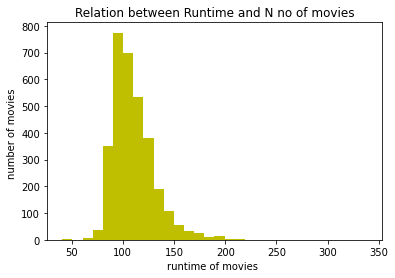

In [22]:
plt.title("Relation between Runtime and N no of movies")
plt.xlabel("runtime of movies ")
plt.ylabel("number of movies ")
plt.hist(movies["runtime"],bins= 30,color="y" )
plt.show()

### plot relation between runtime and budget

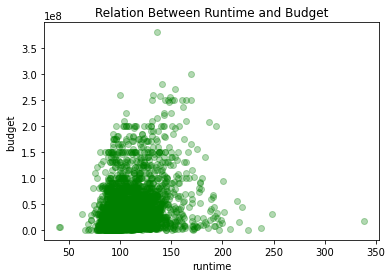

In [24]:
plt.title("Relation Between Runtime and Budget")
plt.xlabel("runtime")
plt.ylabel("budget ")
plt.scatter(movies["runtime"],movies["budget"], alpha=0.3,color = "g")
plt.show()

## **2**: *Which* are the successfull genres?

In [27]:
#showing types of our movies 
print(movies.iloc[:,1].values)

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 ...
 '[{"id": 80, "name": "Crime"}, {"id": 27, "name": "Horror"}, {"id": 9648, "name": "Mystery"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 878, "name": "Science Fiction"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 53, "name": "Thriller"}]']


In [28]:
count = pd.Series(movies['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
count

[{"id": 18, "name": "Drama"}]                                                                                                               204
[{"id": 35, "name": "Comedy"}]                                                                                                              197
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                              96
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                             87
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                  70
                                                                                                                                           ... 
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 878, "name": "Science Fiction"}, {"id": 18, "name": "Drama"}]   

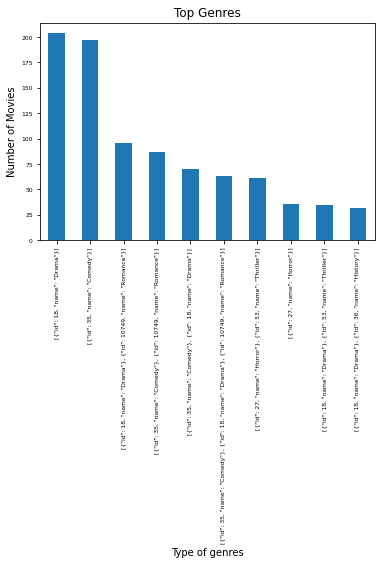

In [29]:
# Initialize the plot
diagram = count[:10].plot.bar(fontsize = 6)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()

### Darma is highest number of movies and it is successful genres

### **3**: Which movie had the highest and lowest budget?

In [32]:
# highest budget
x = movies.loc[movies['budget'].idxmax()]
print(x)
print("_______________________________________")
print(x["budget"])
print("_______________________________________")
print(x["title"])

budget                                                            3.8e+08
genres                  [{"id": 12, "name": "Adventure"}, {"id": 28, "...
original_language                                                      en
original_title                Pirates of the Caribbean: On Stranger Tides
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2011-05-14
revenue                                                       1.04571e+09
runtime                                                               136
spoken_languages        [{"iso_639_1": "en", "name": "English"}, {"iso...
status                                                           Released
title                         Pirates of the Caribbean: On Stranger Tides
vote_count                                                           4948
Name: 17, dtype: object
_______________________________________
380000000.0
____________________________________

In [34]:
#Lowest budget 
y=movies.loc[movies['budget'].idxmin()]
print(y)
print("_______________________________________")
print(y ["budget"])
print("_______________________________________")
print(y["title"])

budget                                                                  1
genres                  [{"id": 18, "name": "Drama"}, {"id": 35, "name...
original_language                                                      en
original_title                                               Modern Times
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   1936-02-05
revenue                                                           8.5e+06
runtime                                                                87
spoken_languages                 [{"iso_639_1": "en", "name": "English"}]
status                                                           Released
title                                                        Modern Times
vote_count                                                            856
Name: 4238, dtype: object
_______________________________________
1.0
_______________________________________
Mo

### **3**: Average budget of the movie

In [35]:
#mean of our budget data
budget_mean = movies.iloc[:,0].mean()
print(budget_mean)

40654444.774233505


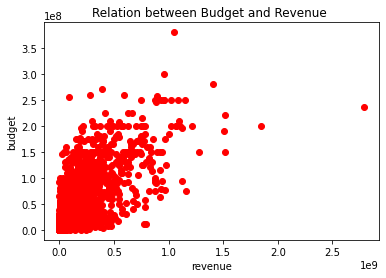

In [36]:
#plot relation between budget and revenue   
revenue = movies.iloc [:,6].values
budget =  movies.iloc[:,0].values 
plt.title("Relation between Budget and Revenue ")
plt.xlabel("revenue")
plt.ylabel("budget")
plt.scatter(revenue,budget , color = "r" )

## That's all for this one.

#### Next analysis soon